Number of network: 2
Total number of connections: 1282


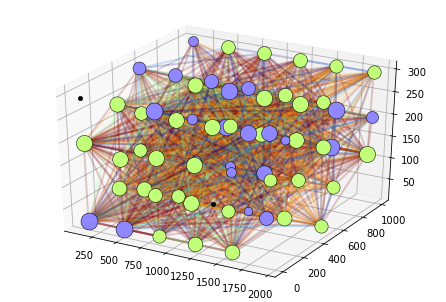

In [1]:
import math 
import community 
import itertools
import numpy as np
import networkx as nx
from itertools import count
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

community_data = 'data/example.csv'
output_image = 'results/output.png'

min_th = 0.5 # filter out less than 0.5
max_th = 1.0
color_step = 5 # the edge color 

linewidth = 2 # the edge thickness

node_min_size = 20 # min size of the node 
node_max_size = 300 # max size of the node

node_border_thickness = 0.5 # border thciness of the node 
edges_count_max = 63 # the number of the nodes 

data = np.loadtxt(community_data, delimiter=",")
G = nx.Graph()
G.add_nodes_from(range(data.shape[0]))
adj = []
corr_adj = {}
count_adj = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    for j in range(i):
        if i != j and data[i, j] != 0:
            if data[i, j] > min_th:
                adj.append([i, j])
                count_adj[i] += 1
                count_adj[j] += 1
                key = str(math.ceil((data[i, j] - min_th)*10))
                if key not in corr_adj.keys():
                    corr_adj[key] = [[i, j]]
                else:
                    corr_adj[key].append([i, j])
           
            G.add_edge(i, j, weight=data[i, j])

partition = community.best_partition(G)
groups = np.array(list(partition.values()))
real_value_idx = np.unique(list(itertools.chain(adj))) 
real_value_groups = np.unique(groups[real_value_idx])
print('Number of network: {}'.format(len(real_value_groups)))

x = [117, 126, 132, 459, 478, 487, 493, 820, 839, 848, 854, 1180, 1200, 1209, 1215, 1541, 1561, 1570, 1576, 1902, 1922, 1930, 98, 117, 126, 132, 478, 487, 493, 839, 848, 854, 1200, 1209, 1215, 1561, 1570, 1576, 1922, 1930, 1937, 117, 126, 132, 459, 478, 487, 493, 820, 839, 848, 854, 1180, 1200, 1209, 1215, 1541, 1561, 1570, 1576, 1902, 1922, 1930]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
z = [296,197,20,112,296,179,20,112,296,197,20,112,296,197,20,112,296,197,20,112,296,197,112,296,197,20,296,197,20,296,197,20,297,197,20,296,197,20,296,197,20,296,197,20,112,296,197,20,112,296,197,20,112,296,197,20,112,296,197,20,112,296,197]

norm = plt.Normalize()
edge_colors = plt.cm.jet(np.linspace(0, 1, color_step))
colors = [(0.76,1,0.47), (0.56,0.53,1), (1,0.57,0.57), (0.47,0.65,1), (0.61,1,0.89), (1,0.22,0.57)]

fig = plt.figure()
ax = Axes3D(fig)

c_list = [colors[list(real_value_groups).index(groups[i])] if groups[i] in real_value_groups else (0,0,0) for i in range(63)]
print('Total number of connections: {}'.format(len(adj)))
for k, v in corr_adj.items():
    color = edge_colors[int(k) - 1]
    for i, j in v:
        ax.plot([x[int(i)], x[int(j)]], [y[int(i)], y[int(j)]], zs=[z[int(i)], z[int(j)]], color=color, linewidth=linewidth, alpha=0.2)

count_adj = np.clip(count_adj, 0, edges_count_max)
for idx, cnt_adj in enumerate(count_adj):
    color_node = [c_list[idx]]
    if cnt_adj == 0:
        color_node = 'k'
    if np.max(count_adj) == 0:
        node_size = node_min_size
    else:
        node_size = (cnt_adj / edges_count_max) * (node_max_size - node_min_size) + node_min_size
    ax.scatter([x[idx]], [y[idx]], [z[idx]], s=node_size, c=color_node, marker='o', linewidths=node_border_thickness, edgecolors='k', alpha=1.0)
fig.savefig(output_image, dpi=300)

